### Hurricane Helene Plot Observed and Forecasted After Landfall Re-creation 

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

# read data from csv
df = pd.read_csv(r'C:\Users\fishk\AnacondaFiles\etss\helenerecreatedata_after.csv')
print(df)
# Convert 'time' column to datetime if desired
#df['time'] = pd.to_datetime(df['time'])

                time  water_levelObs  water_levelFcst
0     9/26/2024 9:07         3.20055              NaN
1    9/26/2024 10:01         3.55332              NaN
2    9/26/2024 11:08         3.48867              NaN
3    9/26/2024 12:59         3.47877              NaN
4    9/26/2024 14:12         3.27651              NaN
..               ...             ...              ...
127  10/1/2024 16:04             NaN          0.96260
128  10/1/2024 17:02             NaN          0.65955
129  10/1/2024 17:53             NaN          0.26482
130  10/1/2024 19:03             NaN         -0.08875
131  10/1/2024 20:00             NaN         -0.25423

[132 rows x 3 columns]


In [18]:
# Set the home base elevation value (MSL ft)
home_base_elev = 6.2
#home_base_elev = 3.67

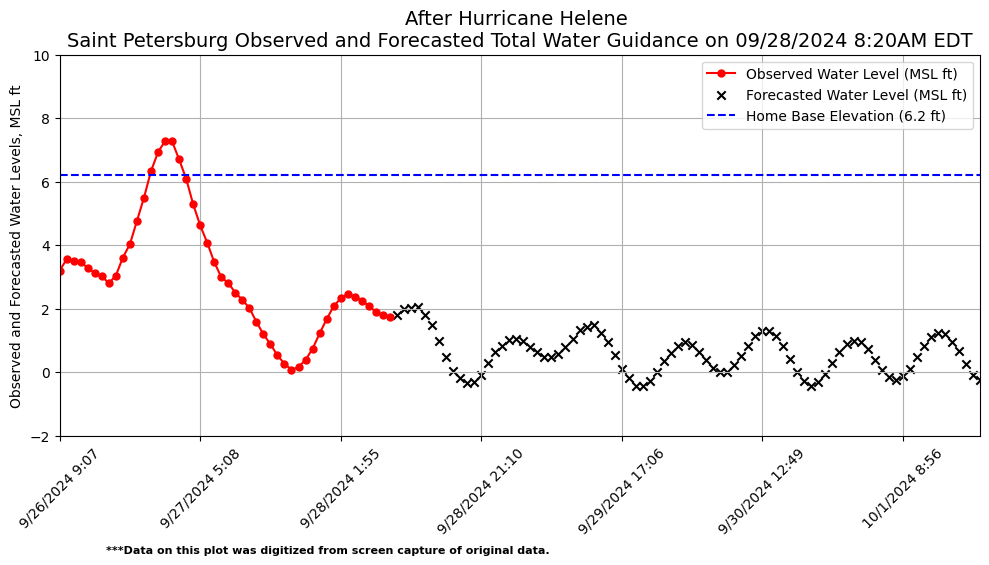

In [19]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df['time'], df['water_levelObs'], marker='o', linestyle='-', color='r', markersize=5, label='Observed Water Level (MSL ft)')
# Add Fcst values as black 'X' markers
plt.scatter(df['time'], df['water_levelFcst'], color='black', marker='x', label='Forecasted Water Level (MSL ft)')
# Add a horizontal line at y = home_base_elev
plt.axhline(y=home_base_elev, color='b', linestyle='--', label=f'Home Base Elevation ({home_base_elev} ft)')
# Set x-axis limits
plt.xlim(df['time'].iloc[0], df['time'].iloc[-1])

plt.title('After Hurricane Helene \nSaint Petersburg Observed and Forecasted Total Water Guidance on 09/28/2024 8:20AM EDT', fontsize=14)
#plt.xlabel('Date')
plt.ylabel('Observed and Forecasted Water Levels, MSL ft')
plt.grid()
plt.ylim(-2,10)
# Reducing the number of dates/times on the x-axis
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(nbins=7))  # Limit to 5 x-axis labels
plt.legend()
# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
# Adding note in bottom left
plt.text(0.05, -0.30, f'***Data on this plot was digitized from screen capture of original data.' ,
         ha='left', va='center', transform=plt.gca().transAxes, fontsize=8, color='black', fontweight='bold')

# tight_layout to automatically adjust plotting parameters
plt.tight_layout()
# Save the plot as a JPEG file
plt.savefig("C:/KG_MobileFiles_2024/Python/helene_plot_after1.jpg", format='jpg')
plt.show()


In [20]:
# Add Columns Barrier_HeightObs and Barrier_HeightFcst to df
df['WaterLevel_DiffObs'] = df['water_levelObs'] - home_base_elev
df['WaterLevel_DiffFcst'] = df['water_levelFcst'] - home_base_elev
print(df)

                time  water_levelObs  water_levelFcst  WaterLevel_DiffObs  \
0     9/26/2024 9:07         3.20055              NaN            -2.99945   
1    9/26/2024 10:01         3.55332              NaN            -2.64668   
2    9/26/2024 11:08         3.48867              NaN            -2.71133   
3    9/26/2024 12:59         3.47877              NaN            -2.72123   
4    9/26/2024 14:12         3.27651              NaN            -2.92349   
..               ...             ...              ...                 ...   
127  10/1/2024 16:04             NaN          0.96260                 NaN   
128  10/1/2024 17:02             NaN          0.65955                 NaN   
129  10/1/2024 17:53             NaN          0.26482                 NaN   
130  10/1/2024 19:03             NaN         -0.08875                 NaN   
131  10/1/2024 20:00             NaN         -0.25423                 NaN   

     WaterLevel_DiffFcst  
0                    NaN  
1                    

In [21]:
# Create Barrier_Height column that checks if Barrier_HeightObs or Barrier_HeightFcst are greater than zero, if true print the positive number, if not NaN
df['Barrier_HeightMin'] = np.where(df['WaterLevel_DiffObs'] > 0, df['WaterLevel_DiffObs'],
                        np.where(df['WaterLevel_DiffFcst'] > 0, df['WaterLevel_DiffFcst'], np.nan))

print(df)

                time  water_levelObs  water_levelFcst  WaterLevel_DiffObs  \
0     9/26/2024 9:07         3.20055              NaN            -2.99945   
1    9/26/2024 10:01         3.55332              NaN            -2.64668   
2    9/26/2024 11:08         3.48867              NaN            -2.71133   
3    9/26/2024 12:59         3.47877              NaN            -2.72123   
4    9/26/2024 14:12         3.27651              NaN            -2.92349   
..               ...             ...              ...                 ...   
127  10/1/2024 16:04             NaN          0.96260                 NaN   
128  10/1/2024 17:02             NaN          0.65955                 NaN   
129  10/1/2024 17:53             NaN          0.26482                 NaN   
130  10/1/2024 19:03             NaN         -0.08875                 NaN   
131  10/1/2024 20:00             NaN         -0.25423                 NaN   

     WaterLevel_DiffFcst  Barrier_HeightMin  
0                    NaN     

In [22]:
barrierHeightReqMin = df['Barrier_HeightMin'].max()
if barrierHeightReqMin > 0:
    print('The maximum forecasted water level:', barrierHeightReqMin.round(2), 'feet MSL, greater than the Home Base Elevation. Barriers are Required.')
else:
    print('The maximum forecasted water level', barrierHeightReqMin.round(2), 'which is less than the Home Base Elevation. \nBarriers should be considered if -1.25 or greater.')

The maximum forecasted water level: 1.08 feet MSL, greater than the Home Base Elevation. Barriers are Required.


### Now  let's compare the observed and forecasted water level differential to the Home Base Elevation.

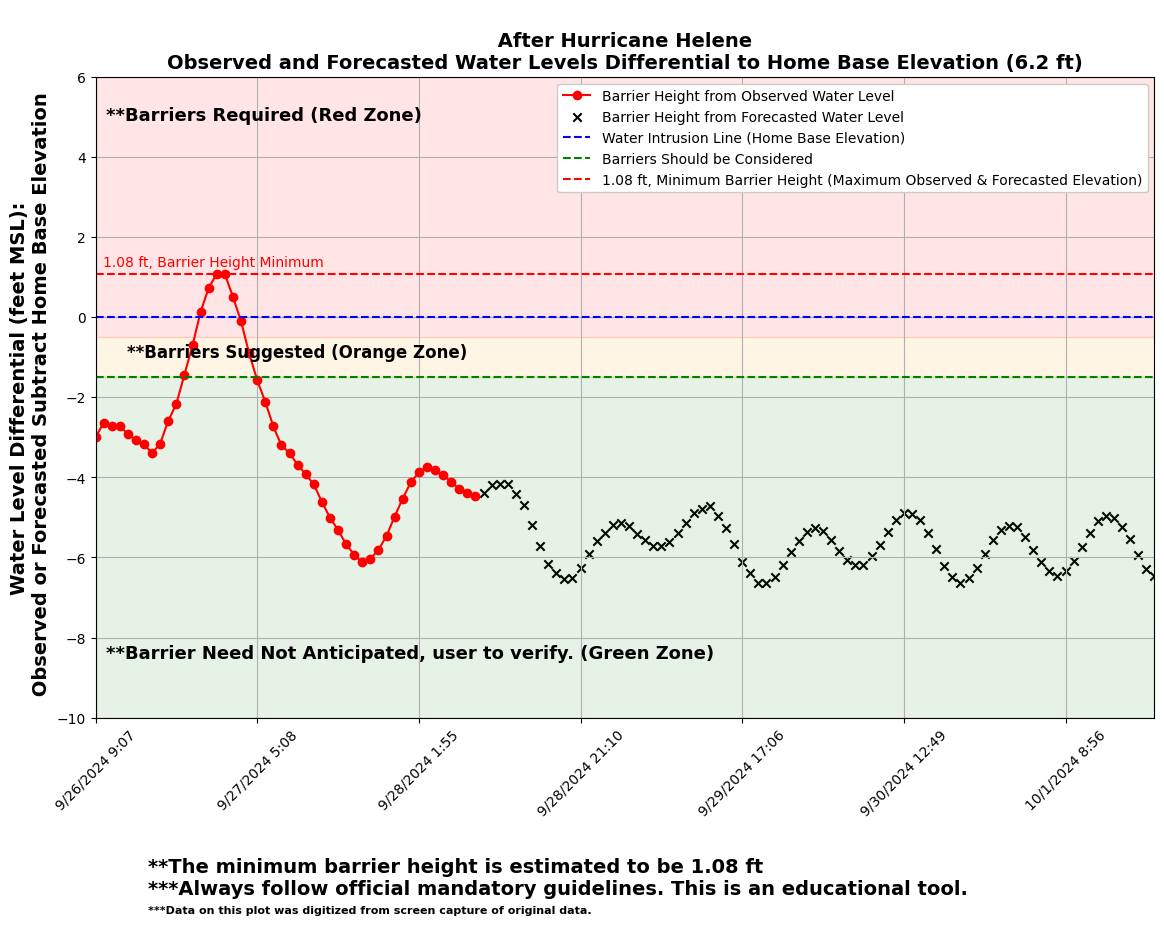

In [23]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates

# Plot data on figure (x) vs (y)
plt.figure(figsize=(12, 10))

# X values will be 'Date(GMT)' and Y values will be 'Obs'
plt.plot(df['time'], df['WaterLevel_DiffObs'], marker='o', linestyle='-', color='r', label='Barrier Height from Observed Water Level')
# Add Fcst values as black 'X' markers
plt.scatter(df['time'], df['WaterLevel_DiffFcst'], color='black', marker='x', label='Barrier Height from Forecasted Water Level')

# Add a horizontal line at y = 0
plt.axhline(y=0, color='b', linestyle='--', label=f'Water Intrusion Line (Home Base Elevation)')
# Add a horizontal line at y = 0
plt.axhline(y=-1.5, color='g', linestyle='--', label=f'Barriers Should be Considered')
# Add a horizontal line at y = 0
plt.axhline(y=barrierHeightReqMin, color='r', linestyle='--', label=f'{barrierHeightReqMin.round(2)} ft, Minimum Barrier Height (Maximum Observed & Forecasted Elevation)')
# Add text label next to the line
plt.text(
    x=0.9,  # Adjust x-position as needed
    y=barrierHeightReqMin + 0.2,  # Slightly above the line for readability
    s=f'{barrierHeightReqMin:.2f} ft, Barrier Height Minimum',
    color='r'
)


# Add fill between y = -5 and y = -1
plt.fill_between(df['time'], -10, -1.5, color='green', alpha=0.1)
# Add fill between y = -1 and y = 0
plt.fill_between(df['time'], -1.5, -0.5, color='orange', alpha=0.1)
# Add fill between y = 3 and y = 0
plt.fill_between(df['time'], 6, -0.5, color='red', alpha=0.1)

# Formatting the plot
#plt.xlabel('Date (GMT)')
plt.ylabel('Water Level Differential (feet MSL):\n Observed or Forecasted Subtract Home Base Elevation', fontsize='14', fontweight='bold')
plt.title(f'\n After Hurricane Helene \nObserved and Forecasted Water Levels Differential to Home Base Elevation ({home_base_elev} ft)', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(framealpha=1)

# Set x-axis limits
plt.xlim(df['time'].iloc[0], df['time'].iloc[-1])

plt.ylim(-10,6)
# Reducing the number of dates/times on the x-axis
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(nbins=7))
# Format x-axis to show date only
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adding the note above the legend
plt.text(0.01, 0.94, "**Barriers Required (Red Zone)",
         ha='left', va='center', transform=plt.gca().transAxes, fontsize=13, color='black', fontweight='bold')

# Adding the text "Barrier recommended" at the fifth date (index 4)
plt.text(x=df['time'].iloc[25], y=-1, s="**Barriers Suggested (Orange Zone)", ha='center', fontsize=12, color='black', fontweight='bold')


# Adding note above legend
plt.text(0.01, 0.1, "**Barrier Need Not Anticipated, user to verify. (Green Zone)",
         ha='left', va='center', transform=plt.gca().transAxes, fontsize=13, color='black', fontweight='bold')

# Adding note in bottom left
plt.text(0.05, -0.25, f'**The minimum barrier height is estimated to be {barrierHeightReqMin.round(2)} ft \n***Always follow official mandatory guidelines. This is an educational tool.' ,
         ha='left', va='center', transform=plt.gca().transAxes, fontsize=14, color='black', fontweight='bold')
# Adding note in bottom left
plt.text(0.05, -0.30, f'***Data on this plot was digitized from screen capture of original data.' ,
         ha='left', va='center', transform=plt.gca().transAxes, fontsize=8, color='black', fontweight='bold')

# tight_layout to automatically adjust plotting parameters
plt.tight_layout(pad=2.0)

# Save the plot as a JPEG file
plt.savefig("C:/KG_MobileFiles_2024/Python/helene_plot_after2.jpg", format='jpg')

# Display the plot
plt.show()